<a href="https://colab.research.google.com/github/ephantusGachomba/covid_africa/blob/main/Covid_africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

This dataset provides the latest information about the COVID-19 situation in 54 African countries. The dataframe consists of 10 columns including (pulled from the content page for the sake of convenience):

* Country - Name of European countries
* Total Cases - Total number of Covid-19 cases
* Total Deaths - Total number of Deaths
* Total Recovered - Total number of recovered cases
* Active Cases - Total number of Active cases
* Total Cases/1 mil population - Total Cases per 1 million of the population
* Death/1 mil population - Total Deaths per 1 million of the population
* Total Tests - Total number of Covid tests done
* Tests/1 mil population - Covid tests done per 1 million of the population
* Population - Population of the country

**Problem Identification:**

1. We expect that more population should have a higher infection rate, is it true?
2. For the countries with high (low) total cases, do they fail (succeed) to prevent from covid or simply because of their high (low) test number/rate?
3. More cases, by chance, should result in more deaths. However, better medical service might also help. Does more cases always result in more deaths?
4. People might be easier to travel between nearby countries. Countries located at the similar region might have a similar number of new cases. But is it true?

In [ ]:
#import the general libraries
import numpy as np
import pandas as pd

#plotting tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import folium
from folium import plugins
!pip install geopandas
import geopandas as gpd
import branca

#stat tools
from scipy.stats import pearsonr

     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 47.3 MB/s 


In [ ]:
#loading the dataset
df = pd.read_csv('covid_africa.csv')

In [ ]:
#Add columns Infection Rate and Death Rate
df['Infection Rate'] = df['Total Cases'] /df['Total Tests']
df['Death Rate'] = df['Total Deaths'] / df['Total Cases']
df.sort_values('Population', ascending=False).style.bar(color = 'lightgreen', axis = 0)

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Death/1 mil population,Total Tests,Tests/1 mil population,Population,Infection Rate,Death Rate
38,Nigeria,207694,2747,195274.000000,9673.000000,977,13,3090114.000000,14533.000000,212627048,0.067212,0.013226
18,Ethiopia,354476,5990,323505.000000,24981.000000,2989,51,3551983.000000,29954.000000,118579450,0.099797,0.016898
14,Egypt,312413,17695,263557.000000,31161.000000,2981,169,3693367.000000,35246.000000,104787578,0.084588,0.056640
13,DRC,57132,1087,50930.000000,5115.000000,614,12,306299.000000,3293.000000,93015571,0.186524,0.019026
48,Tanzania,25957,723,nan,nan,419,12,nan,nan,61893320,nan,0.027854
45,South Africa,2912145,88317,2791256.000000,32572.000000,48326,1466,17982358.000000,298413.000000,60260021,0.161945,0.030327
25,Kenya,251152,5181,243944.000000,2027.000000,4544,94,2606152.000000,47148.000000,55275926,0.096369,0.020629
51,Uganda,124646,3176,96278.000000,25192.000000,2620,67,1723620.000000,36231.000000,47573189,0.072316,0.025480
47,Sudan,38824,2928,32395.000000,3501.000000,860,65,238579.000000,5284.000000,45149561,0.162730,0.075417
0,Algeria,204597,5853,140238.000000,58506.000000,4561,130,230861.000000,5147.000000,44857594,0.886235,0.028607


# Data Cleaning

In [ ]:
#Check for missing values
df[df.isna().any(axis=1)]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Death/1 mil population,Total Tests,Tests/1 mil population,Population,Infection Rate,Death Rate
10,Comoros,4165,147,3997.0,21.0,4663,165,NaN,NaN,893136,NaN,0.035294
48,Tanzania,25957,723,NaN,NaN,419,12,NaN,NaN,61893320,NaN,0.027854


**Question 1:**

We expect that more population should have a higher infection rate, is it true?

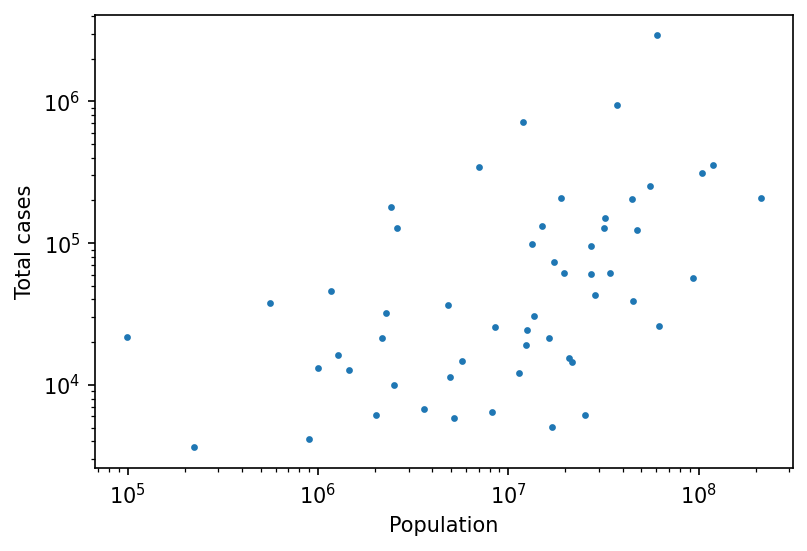

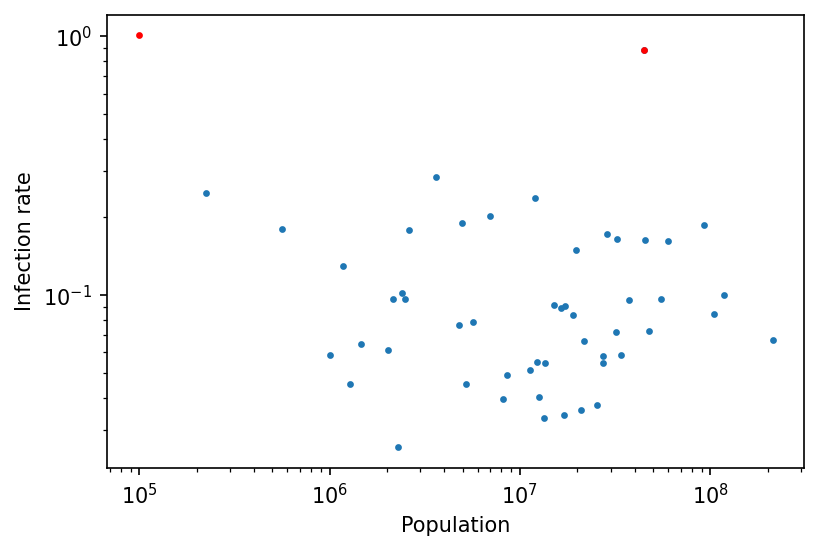

In [ ]:
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
ax.scatter(df['Population'], df['Total Cases'], s=5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Population')
ax.set_ylabel('Total cases')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df[df['Infection Rate']<1]['Population'], df[df['Infection Rate']<1]['Infection Rate'], s=5)
ax.scatter(df[df['Infection Rate']>0.8]['Population'], df[df['Infection Rate']>0.8]['Infection Rate'], s=5, c='r')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Population')
ax.set_ylabel('Infection rate')
plt.show()

In [ ]:
corr, _ = pearsonr(np.log10(df['Population']), np.log10((df['Total Cases'])))
print("Pearson R (population against total cases):", round(corr, 5))
corr, _ = pearsonr(np.log10(df[df['Infection Rate'].notna()]['Population']), np.log10(df[df['Infection Rate'].notna()]['Infection Rate']))
print("Pearson R (population against infection rate):", round(corr, 5))

Pearson R (population against total cases): 0.52493
Pearson R (population against infection rate): -0.18748


**What can we get?**

Population against total cases:

The Pearson's correlation of 0.52 shows that the  p -value= 4.6×10−5 . It indicates that the population and the total cases have a strong positive correlation in log-log scale. We conclude that higher population could result in more cases.

Population against infection rate:

The Pearson's correlation of -0.19 shows that the  p -value= 0.18<0.05 . Therefore, the correlation is insignificant. It implies that higher population does not imply a higher infection rate. Also, we can see that there is 1 data point with infection rate > 1, which does not make sense. There is another country with a high infection rate of > 0.8, which is unlikely to be true too.

**Question 2:**

For the countries with high (low) total cases, do they fail (succeed) to prevent from covid or simply because of their high (low) test number/rate?

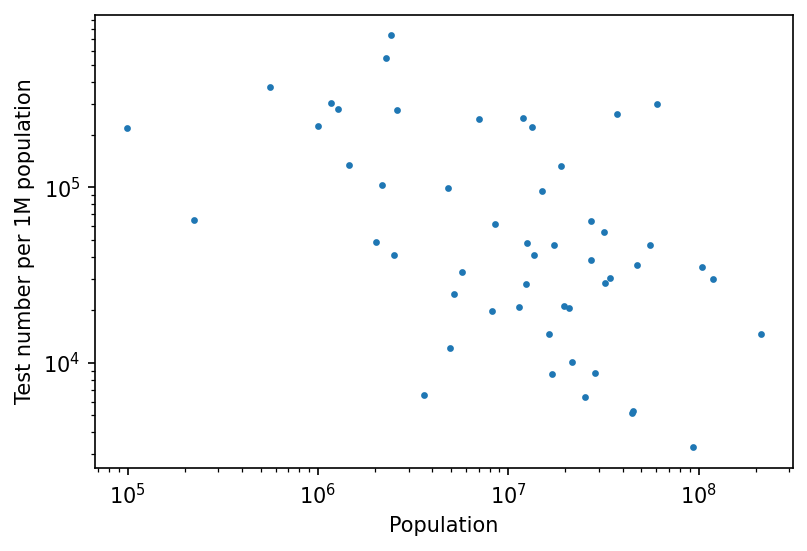

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['Population'], df['Tests/1 mil population'], s=5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Population')
ax.set_ylabel('Test number per 1M population')
plt.show()

In [ ]:
corr, _ = pearsonr(np.log10(df[df['Tests/1 mil population'].notna()]['Population']), np.log10((df[df['Tests/1 mil population'].notna()]['Tests/1 mil population'])))
print("Pearson R (population against test rate):", round(corr, 5))

Pearson R (population against test rate): -0.50679


**What can we get?**

Population against test rate:

The Pearson's correlation of -0.51 shows that the  p -value= 1.3×10−4 . It indicates that the population and the test rate have an obvious negative correlation in log-log scale. It indicates that countries with higher population typically have a lower test rate. Therefore, the true number of cases are under-estimated.

**Question 3:**

More cases, by chance, should result in more deaths. However, better medical service might also help. Does more cases always result in more deaths?

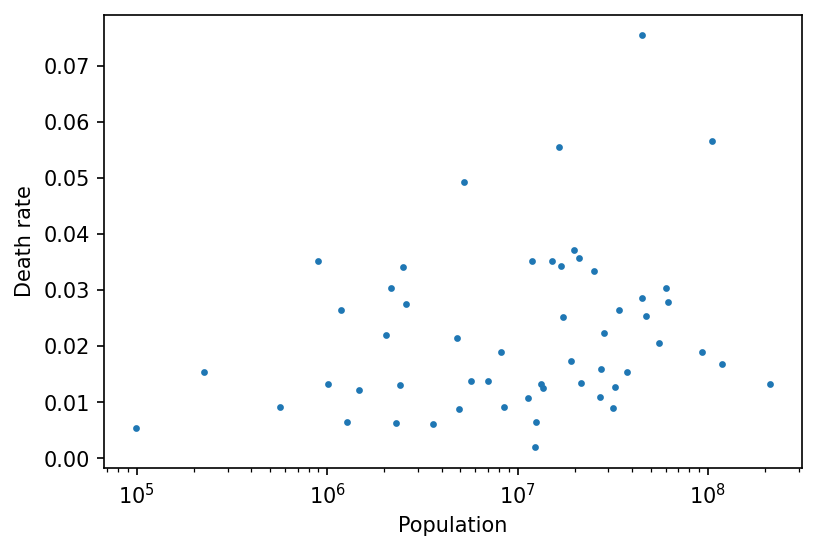

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['Population'], df['Death Rate'], s=5)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Population')
ax.set_ylabel('Death rate')
plt.show()

In [ ]:
corr, _ = pearsonr(np.log10(df['Population']), np.log10((df['Death Rate'])))
print("Pearson R (population against test rate):", round(corr, 5))

Pearson R (population against test rate): 0.2929


**What can we get**?

Population against death rate:

The Pearson's correlation of 0.293 shows that the  p -value= 0.03<0.05 . The positive correlation is very weak. It indicates that there is no obvious evidence showing a higher population country would have a lower death rate. There are 2 explanations:

--> Higher population does not imply a better medical service

---> All countries do not have idea on how to cure covid effectively

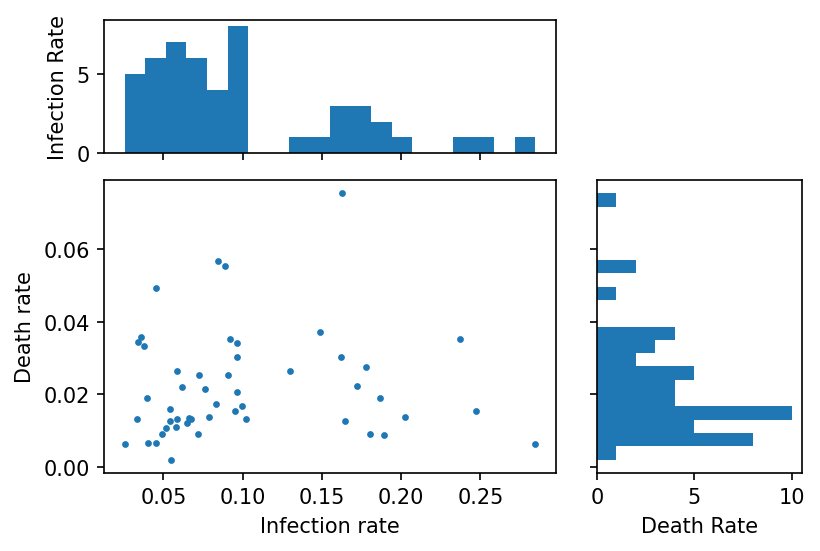

In [ ]:
fig = plt.figure()
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(df[df['Infection Rate']<0.8]['Infection Rate'], df[df['Infection Rate']<0.8]['Death Rate'], s=5)
ax_main.set(xlabel="Infection rate", ylabel="Death rate")

ax_xDist.hist(df[df['Infection Rate']<0.8]['Infection Rate'], bins=20, align='mid')
ax_xDist.set(ylabel='Infection Rate')

ax_yDist.hist(df[df['Infection Rate']<0.8]['Death Rate'], bins=20,orientation='horizontal',align='mid')
ax_yDist.set(xlabel='Death Rate')

plt.setp(ax_xDist.get_xticklabels(), visible=False)
plt.setp(ax_yDist.get_yticklabels(), visible=False)


plt.show()

In [ ]:
corr, _ = pearsonr(df[df['Infection Rate']<0.8]['Infection Rate'], df[df['Infection Rate']<0.8]['Death Rate'])
print("Pearson R (population against test rate):", round(corr, 5))

Pearson R (population against test rate): 0.06244


**What can we get?**

Infection rate against death rate:

The Pearson's correlation of  0.062≈0 . No correlation is found between the infection rate and the death rate. It implies once a person gets covid, the death rate is similar among countries. It matches with the hypothesis of all countries do not know how to cure covid effectively.

In [ ]:
# For geographic plotting
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

# For geographic plotting
global_polygons = gpd.read_file(country_shapes)
global_polygons.to_file('global_polygons.geojson', driver = 'GeoJSON')

df_new = pd.merge(global_polygons, df, left_on='name',right_on='Country')

In [ ]:
col = 'Infection Rate'
minimum, maximum = df_new[col].min(), df_new[col].max()
mean = df[col].mean()

colormap = branca.colormap.LinearColormap(
    colors=["#f2f0f7", "#cbc9e2", "#9e9ac8", "#756bb1", "#54278f"],
    index=df_new[col].quantile([0.25, 0.5, 0.85, 0.95]),
    vmin=minimum,
    vmax=maximum,
)

colormap.caption = col

from folium.plugins import Search
from folium.plugins import HeatMap

m = folium.Map(location=(50,0),zoom_start=3)

def style_function(x):
    return {
        "fillColor": colormap(x["properties"][col]),
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.5,
    }

Map_Layer = folium.GeoJson(
    df_new,
    name=col,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=["Country", "Population", "Total Cases","Total Deaths",
                "Total Tests","Infection Rate", "Death Rate"],
                 aliases=["Country", "Population", "Total Cases",
                          "Total Deaths","Total Tests","Infection Rate", "Death Rate"], localize=True),).add_to(m)

plugins.Search(Map_Layer,position='topleft',
                           search_zoom=5,placeholder="Search for a country",weight=3,
                           search_label='Country',
                           geom_type='Polygon').add_to(m)

minimap = plugins.MiniMap()
m.add_child(minimap)
    
folium.LayerControl().add_to(m)
colormap.add_to(m)

m